# Final Report Note Book - Gloom

In [1]:
#import statements
import networkx as nx
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb

In [2]:
#These were the networks that were filtered by tags logically and by one degree on Gephi
#They had to be filtered on Gephi because we logically had to take out tags that made no sense in our network
lotr = nx.read_graphml('filteredFinalLOTR.graphml')
st =  nx.read_graphml('filteredFinalST.graphml')

## Calculating Projected Networks

Filtered Lotr: 261
projected graph nodes-blogs: 92


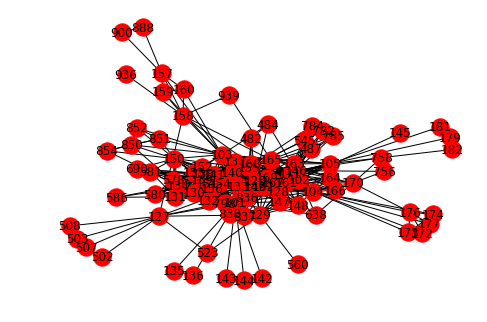

In [3]:
#Lotr Blog to Blog
print("Filtered Lotr:", len(lotr.nodes()))
lotr_nodes_dict = dict(nx.get_node_attributes(lotr, 'bipartite'))
lotrBlogs = []

for node in lotr_nodes_dict:
    if lotr_nodes_dict[node] == 0:
        lotrBlogs.append(node)

lotr_projected = nx.bipartite.weighted_projected_graph(lotr, lotrBlogs)
print("projected graph nodes-blogs:", len(lotr_projected.nodes()))
nx.draw(lotr_projected, with_labels=True)
nx.write_graphml(lotr_projected,'mile7LOTRB-B.graphml')

Filtered Star Trek: 285
projected graph nodes-blogs: 100


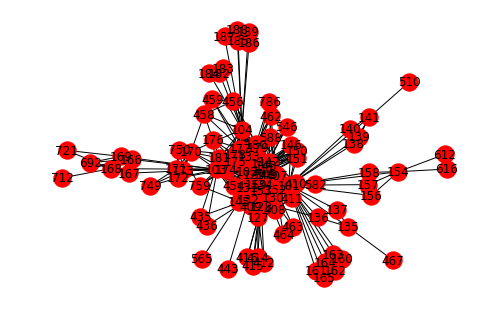

In [4]:
#Star Trek Blog to Blog
print("Filtered Star Trek:", len(st.nodes()))
st_dict = dict(nx.get_node_attributes(st, 'bipartite'))
stBlogs = []

for node in st_dict:
    if st_dict[node] == 0:
        stBlogs.append(node)

st_projected_blogs = nx.bipartite.weighted_projected_graph(st, stBlogs)
print("projected graph nodes-blogs:", len(st_projected_blogs.nodes()))

nx.draw(st_projected_blogs, with_labels=True)
nx.write_graphml(st_projected_blogs, "mile7STB-B.graphml")

Filtered Lotr: 261
projected graph nodes-tags: 169


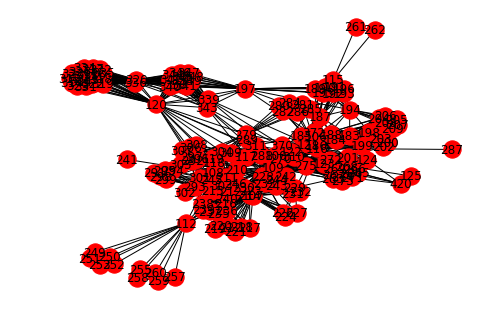

In [5]:
#Lotr Tag to Tag
print("Filtered Lotr:", len(lotr.nodes()))
lotr_dict = dict(nx.get_node_attributes(lotr, 'bipartite'))
lotrTags = []

for node in lotr_dict:
    if lotr_dict[node] == 1:
        lotrTags.append(node)

lotr_projected_tags = nx.bipartite.weighted_projected_graph(lotr, lotrTags)
print("projected graph nodes-tags:", len(lotr_projected_tags.nodes()))

nx.draw(lotr_projected_tags, with_labels=True)
nx.write_graphml(lotr_projected_tags,'mile7LOTRT-T.graphml')

projected graph nodes-tags: 185


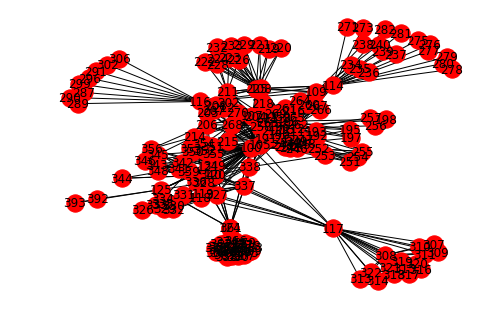

In [6]:
#Star Trek Tag to Tag
st_dict = dict(nx.get_node_attributes(st, 'bipartite'))
stTags = []

for node in st_dict:
    if st_dict[node] == 1:
        stTags.append(node)

st_projected_tags = nx.bipartite.weighted_projected_graph(st, stTags)
print("projected graph nodes-tags:", len(st_projected_tags.nodes()))

nx.draw(st_projected_tags, with_labels=True)
nx.write_graphml(st_projected_tags, 'mile7STT-T.graphml')

## Finding closeness centrality from our projected graphs

In [7]:
lotrBlogs = nx.read_graphml("mile7LOTRB-B.graphml")
lotrTags = nx.read_graphml("mile7LOTRT-T.graphml")
stBlogs = nx.read_graphml("mile7STB-B.graphml")
stTags = nx.read_graphml("mile7STT-T.graphml")

In [8]:

#Computing Closeness centrality for the tags 
clo = pd.Series(nx.closeness_centrality(lotrTags))
fraLOTR = {}
clo2 = pd.Series(nx.closeness_centrality(stTags))
fraST = {}

#suggested to do the fraction for plots instead
i = 0
for x in clo:
    fraLOTR[clo[i]] = x/len(clo)
    i= i +1
i = 0
for x in clo2:
    fraST[clo2[i]] = x/len(clo2)
    i= i +1

lr = pd.DataFrame()
lr['Closeness Centrality'] = fraLOTR
sr = pd.DataFrame()
sr['Closeness Centrality'] = fraST

C:\Users\esele\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'# of nodes'),
 Text(0.5,0,'Closeness Centrality'),
 Text(0.5,1,'Lord of the Rings Tag-Tag Closeness Centrality')]

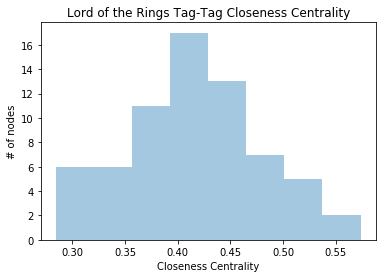

In [9]:
#Closeness Centrality Graph - Lord of the Rings
ax = sb.distplot(lr['Closeness Centrality'], kde= False)
ax.set(xlabel='Closeness Centrality', ylabel='# of nodes', title = "Lord of the Rings Tag-Tag Closeness Centrality")

C:\Users\esele\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'# of nodes'),
 Text(0.5,0,'Closeness Centrality'),
 Text(0.5,1,'Star Trek Tag-Tag Closeness Centrality')]

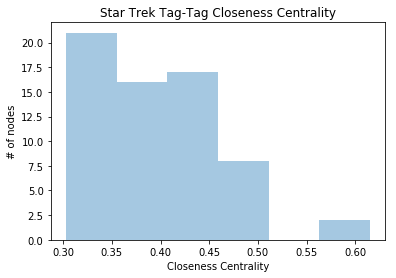

In [10]:
#Closeness Centrality Graph - Lord of the Rings
ax = sb.distplot(sr['Closeness Centrality'], kde= False)
ax.set(xlabel='Closeness Centrality', ylabel='# of nodes', title = "Star Trek Tag-Tag Closeness Centrality")

## Finding degree distribution of our networks

(array([155.,  43.,  32.,  13.,   7.,   3.,   5.,   0.,   2.,   1.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

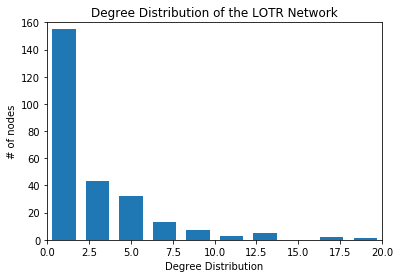

In [11]:
#Degree Distribution graph
plt.ylim(0,160)
plt.xlim(0,20)
plt.ylabel('# of nodes')
plt.xlabel('Degree Distribution')
plt.title('Degree Distribution of the LOTR Network')
deg = dict(nx.degree(lotr))
plt.hist(deg.values(), rwidth=.7, align='left')

(array([183.,  70.,  16.,   7.,   4.,   2.,   1.,   0.,   0.,   2.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <a list of 10 Patch objects>)

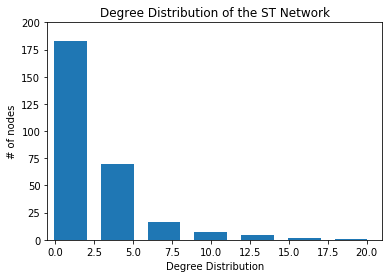

In [12]:
plt.ylim(0,200)
plt.xlim(-.5,21)
plt.ylabel('# of nodes')
plt.xlabel('Degree Distribution')
plt.title('Degree Distribution of the ST Network')
deg = dict(nx.degree(st))
plt.hist(deg.values(), rwidth=.7, align='left')

(array([46., 23.,  3.,  3.,  7.,  7.,  8.,  2.,  0.,  1.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

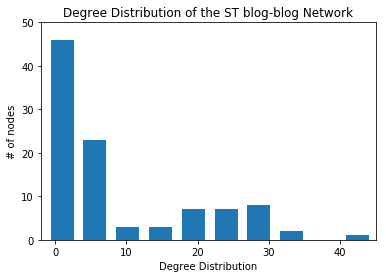

In [13]:
plt.ylim(0,50)
plt.xlim(-2,45)
plt.ylabel('# of nodes')
plt.xlabel('Degree Distribution')
plt.title('Degree Distribution of the ST blog-blog Network')
deg = dict(nx.degree(stBlogs))
plt.hist(deg.values(), rwidth=.7, align='left')

(array([66., 41., 26., 12., 34.,  3.,  1.,  1.,  0.,  1.]),
 array([ 1. ,  7.8, 14.6, 21.4, 28.2, 35. , 41.8, 48.6, 55.4, 62.2, 69. ]),
 <a list of 10 Patch objects>)

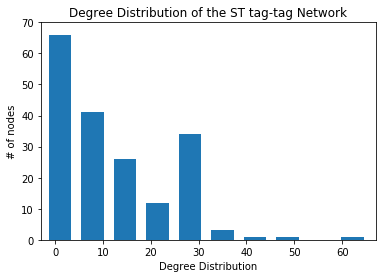

In [14]:
plt.ylim(0,70)
plt.xlim(-3,67)
plt.ylabel('# of nodes')
plt.xlabel('Degree Distribution')
plt.title('Degree Distribution of the ST tag-tag Network')
deg = dict(nx.degree(stTags))
plt.hist(deg.values(), rwidth=.7, align='left')

(array([29., 19.,  9.,  9.,  6.,  7.,  4.,  5.,  2.,  2.]),
 array([ 1. ,  4.8,  8.6, 12.4, 16.2, 20. , 23.8, 27.6, 31.4, 35.2, 39. ]),
 <a list of 10 Patch objects>)

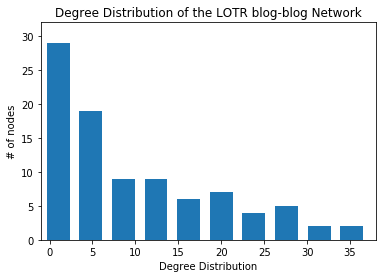

In [15]:
plt.ylim(0,32)
plt.xlim(-1,38)
plt.ylabel('# of nodes')
plt.xlabel('Degree Distribution')
plt.title('Degree Distribution of the LOTR blog-blog Network')
deg = dict(nx.degree(lotrBlogs))
plt.hist(deg.values(), rwidth=.7, align='left')

(array([38., 45., 37., 33.,  7.,  5.,  2.,  0.,  0.,  2.]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <a list of 10 Patch objects>)

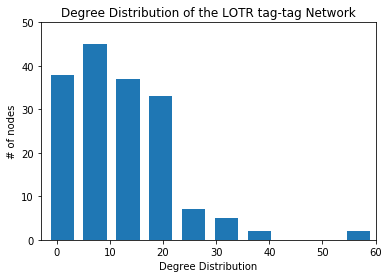

In [16]:
plt.ylim(0,50)
plt.xlim(-3,60)
plt.ylabel('# of nodes')
plt.xlabel('Degree Distribution')
plt.title('Degree Distribution of the LOTR tag-tag Network')
deg = dict(nx.degree(lotrTags))
plt.hist(deg.values(), rwidth=.7, align='left')

## Calculating density of our networks

In [17]:
print("Density of LOTR Graph:")
nx.density(lotr)

Density of LOTR Graph:


0.01273209549071618

In [18]:
print("Density of ST Graph:")
nx.density(st)

Density of ST Graph:


0.012972572275759823

In [19]:
print("Density of ST blog-blog Graph:")
nx.density(stBlogs)

Density of ST blog-blog Graph:


0.1101010101010101

In [20]:
print("Density of ST tag-tag Graph:")
nx.density(stTags)

Density of ST tag-tag Graph:


0.07984723854289072

In [21]:
print("Density of LOTR blog-blog Graph:")
nx.density(lotrBlogs)

Density of LOTR blog-blog Graph:


0.12589584328714765

In [22]:
print("Density of LOTR tag-tag Graph:")
nx.density(lotrTags)

Density of LOTR tag-tag Graph:


0.08918005071851226

## Calculating Diameter of our networks

In [23]:
print("Diameter of LOTR Graph:")
nx.diameter(lotr,e=None)

Diameter of LOTR Graph:


10

In [24]:
print("Diameter of ST Graph:")
nx.diameter(st,e=None)

Diameter of ST Graph:


10

In [25]:
print("Diameter of ST blog-blog Graph:")
nx.diameter(stBlogs,e=None)

Diameter of ST blog-blog Graph:


5

In [26]:
print("Diameter of ST tag-tag Graph:")
nx.diameter(stTags,e=None)

Diameter of ST tag-tag Graph:


4

In [27]:
print("Diameter of LOTR blog-blog Graph:")
nx.diameter(lotrBlogs,e=None)

Diameter of LOTR blog-blog Graph:


5

In [28]:
print("Diameter of LOTR tag-tag Graph:")
nx.diameter(lotrTags,e=None)

Diameter of LOTR tag-tag Graph:


4

### - By Elona S, David P, and Logan M.